# Detection of Seismic Events using YOLOv8 Algorithm

In this Notebook, we created a creative approach to detect the seismic events using direct detection from the plots with YOLOv8 Algorithm!

The goal from this technique is to develop an easy way to label Seismic events which will increase the data quality which will allow more powerful algorithms to detect the seismic events accurately.


## Notebook Setup


In [2]:
!nvidia-smi

Sat Oct  5 17:42:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8 by installing Ultralytics library.


In [ ]:
!pip install ultralytics==8.0.196 roboflow

In [4]:
from IPython import display
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


# Downloading our Dataset via API from Roboflow.

We used a tool called RoboFLow to label the data by annotating some of them manually then utilizing pre-trained models to label the rest.

We used 264 images from the dataset, an augmentation technique is applied in the dataset by adding noise to help the model detect the events in various ways.

The data was splitted into 86% training set, 9% validation set and 5% test set.


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

In [6]:
# Download labeled data from Roboflow
rf = Roboflow(api_key="") # Set your API key and project details
project = rf.workspace("dentalll").project("seismic-events")
version = project.version(1)
dataset = version.download("yolov8")

/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.11 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is 


Extracting Dataset Version Zip to seismic-events-1 in yolov8:: 100%|██████████| 536/536 [00:00<00:00, 7089.02it/s]


# Finetuning Yolov8 on our dataset.

we trained the model on 16 batch size and 25 epochs.


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 103MB/s]
New https://pypi.org/project/ultralytics/8.3.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/seismic-events-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=F

In [8]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   train_batch225.jpg
confusion_matrix.png				   train_batch226.jpg
confusion_matrix_normalized.png			   train_batch227.jpg
events.out.tfevents.1728150205.09af336e334a.101.0  val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
labels_correlogram.jpg				   weights
results.csv


# Visualizing model results.


/kaggle/working


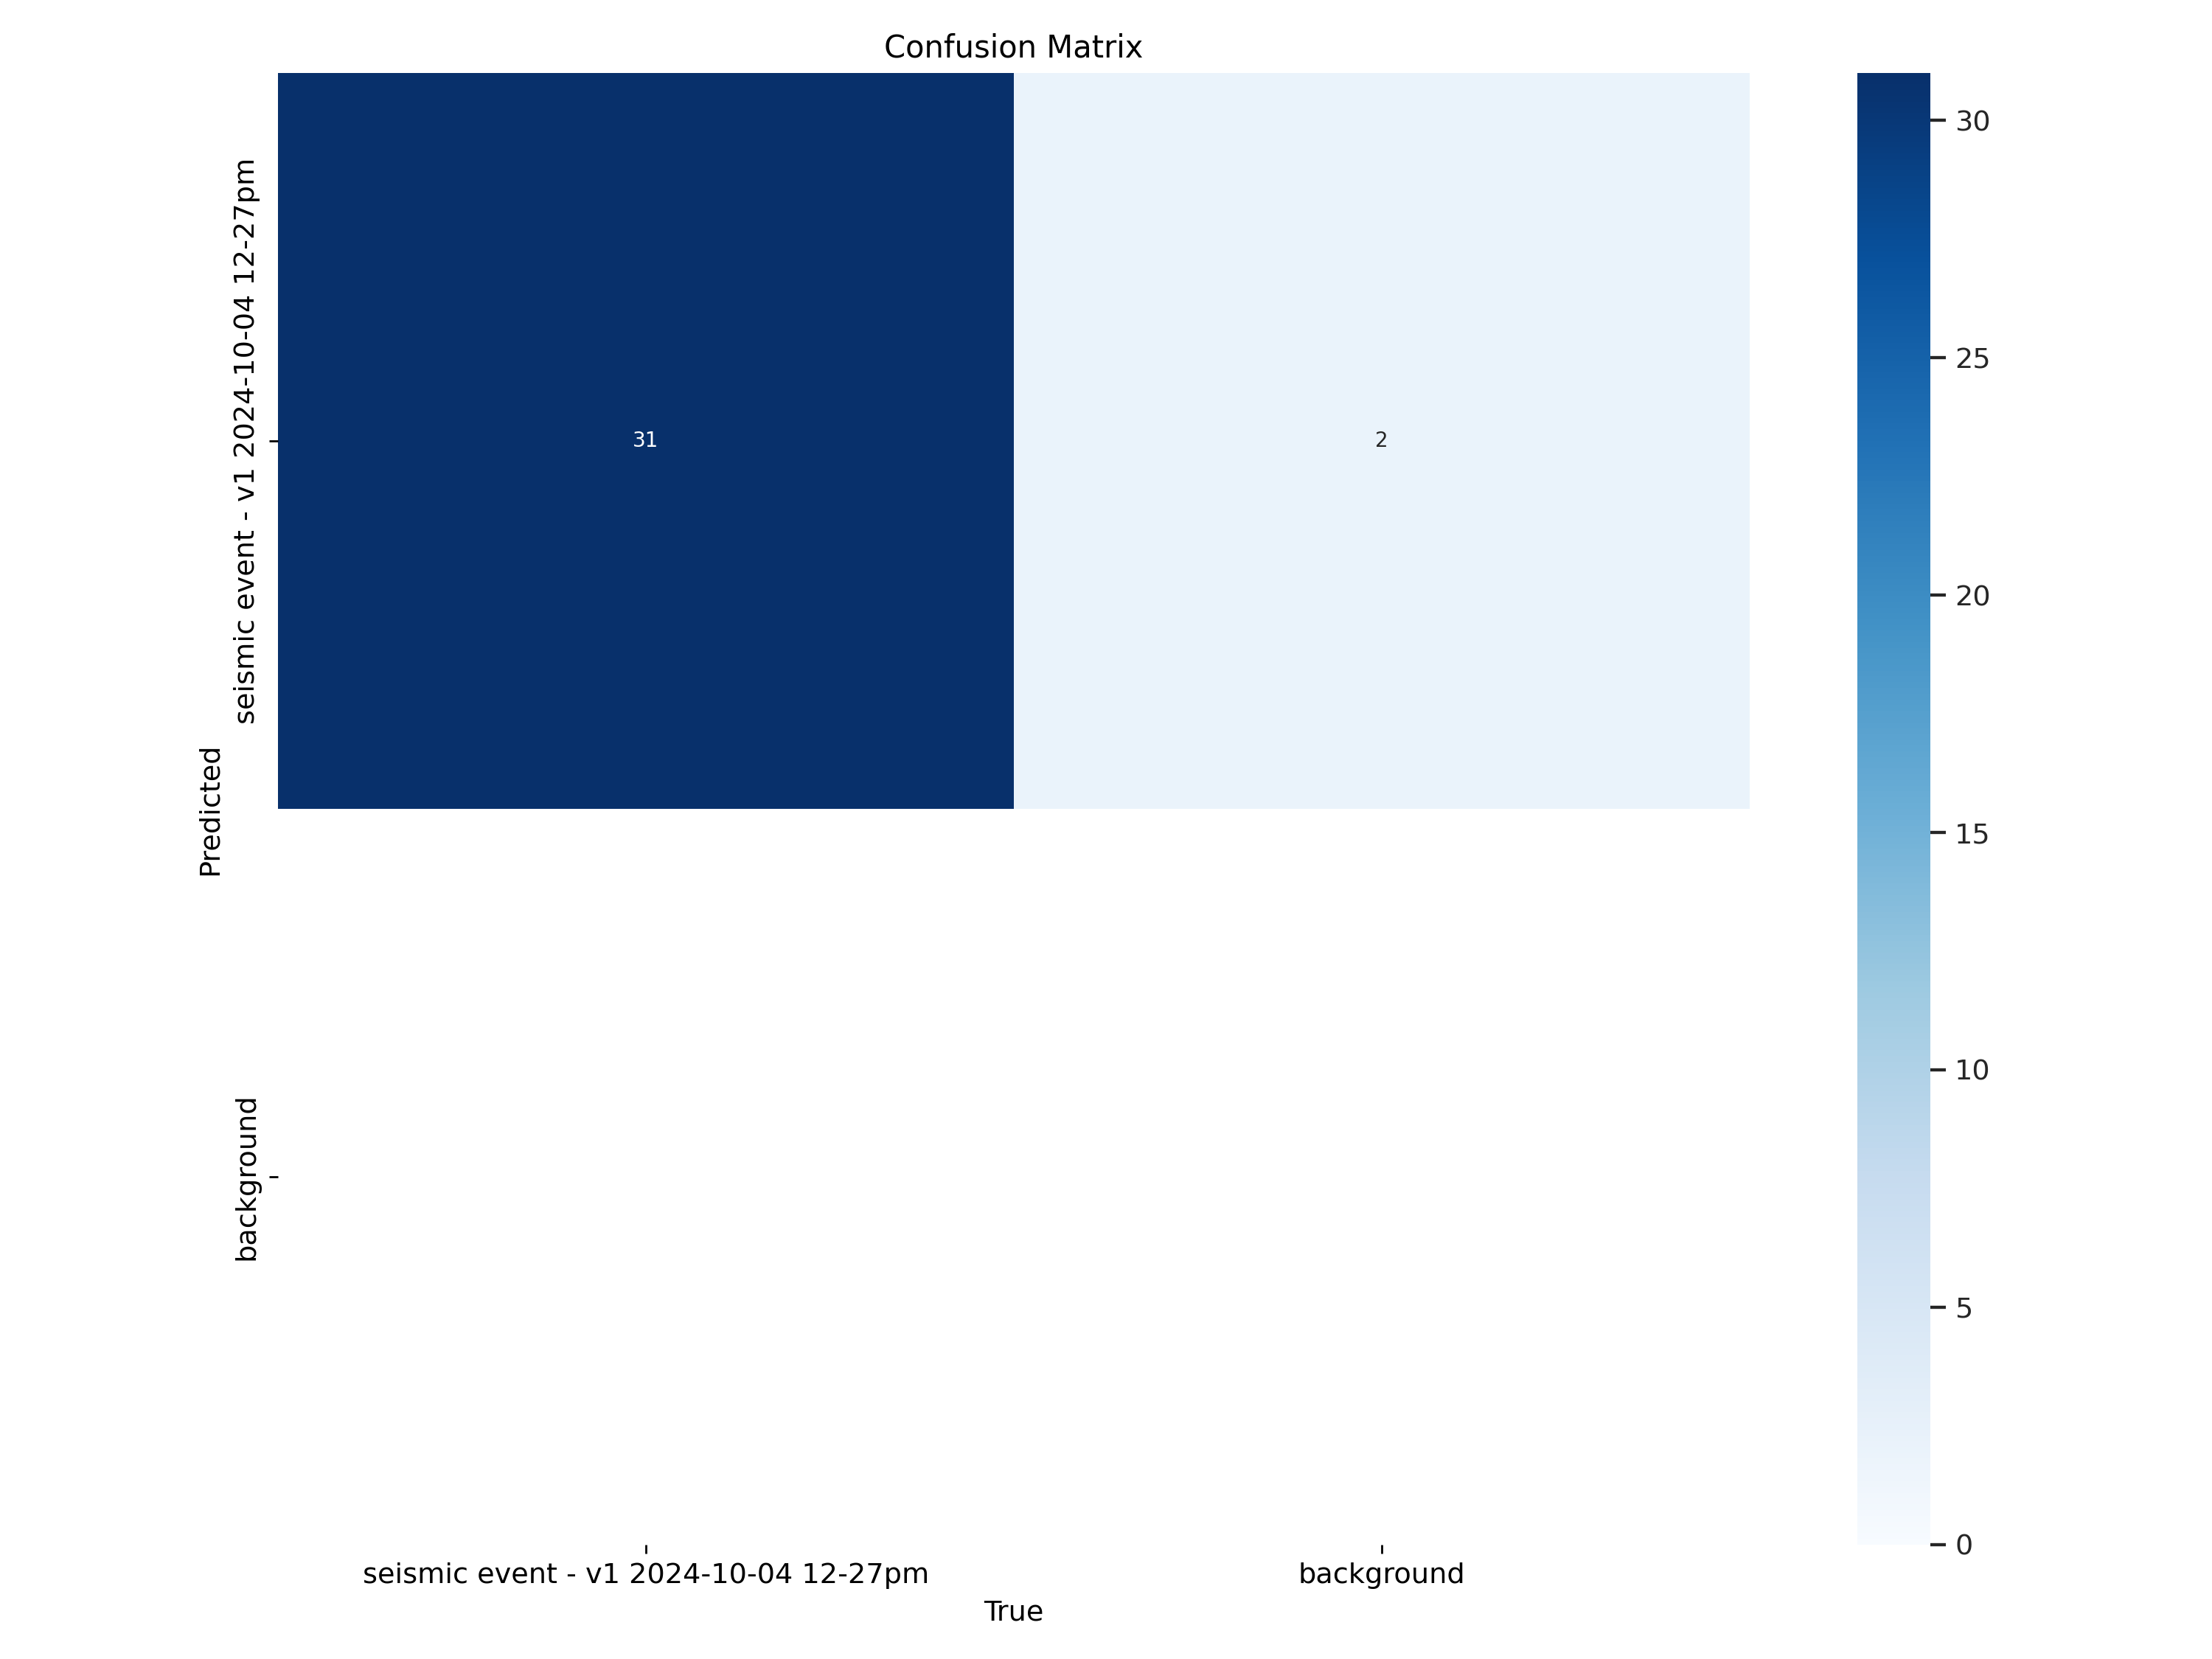

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


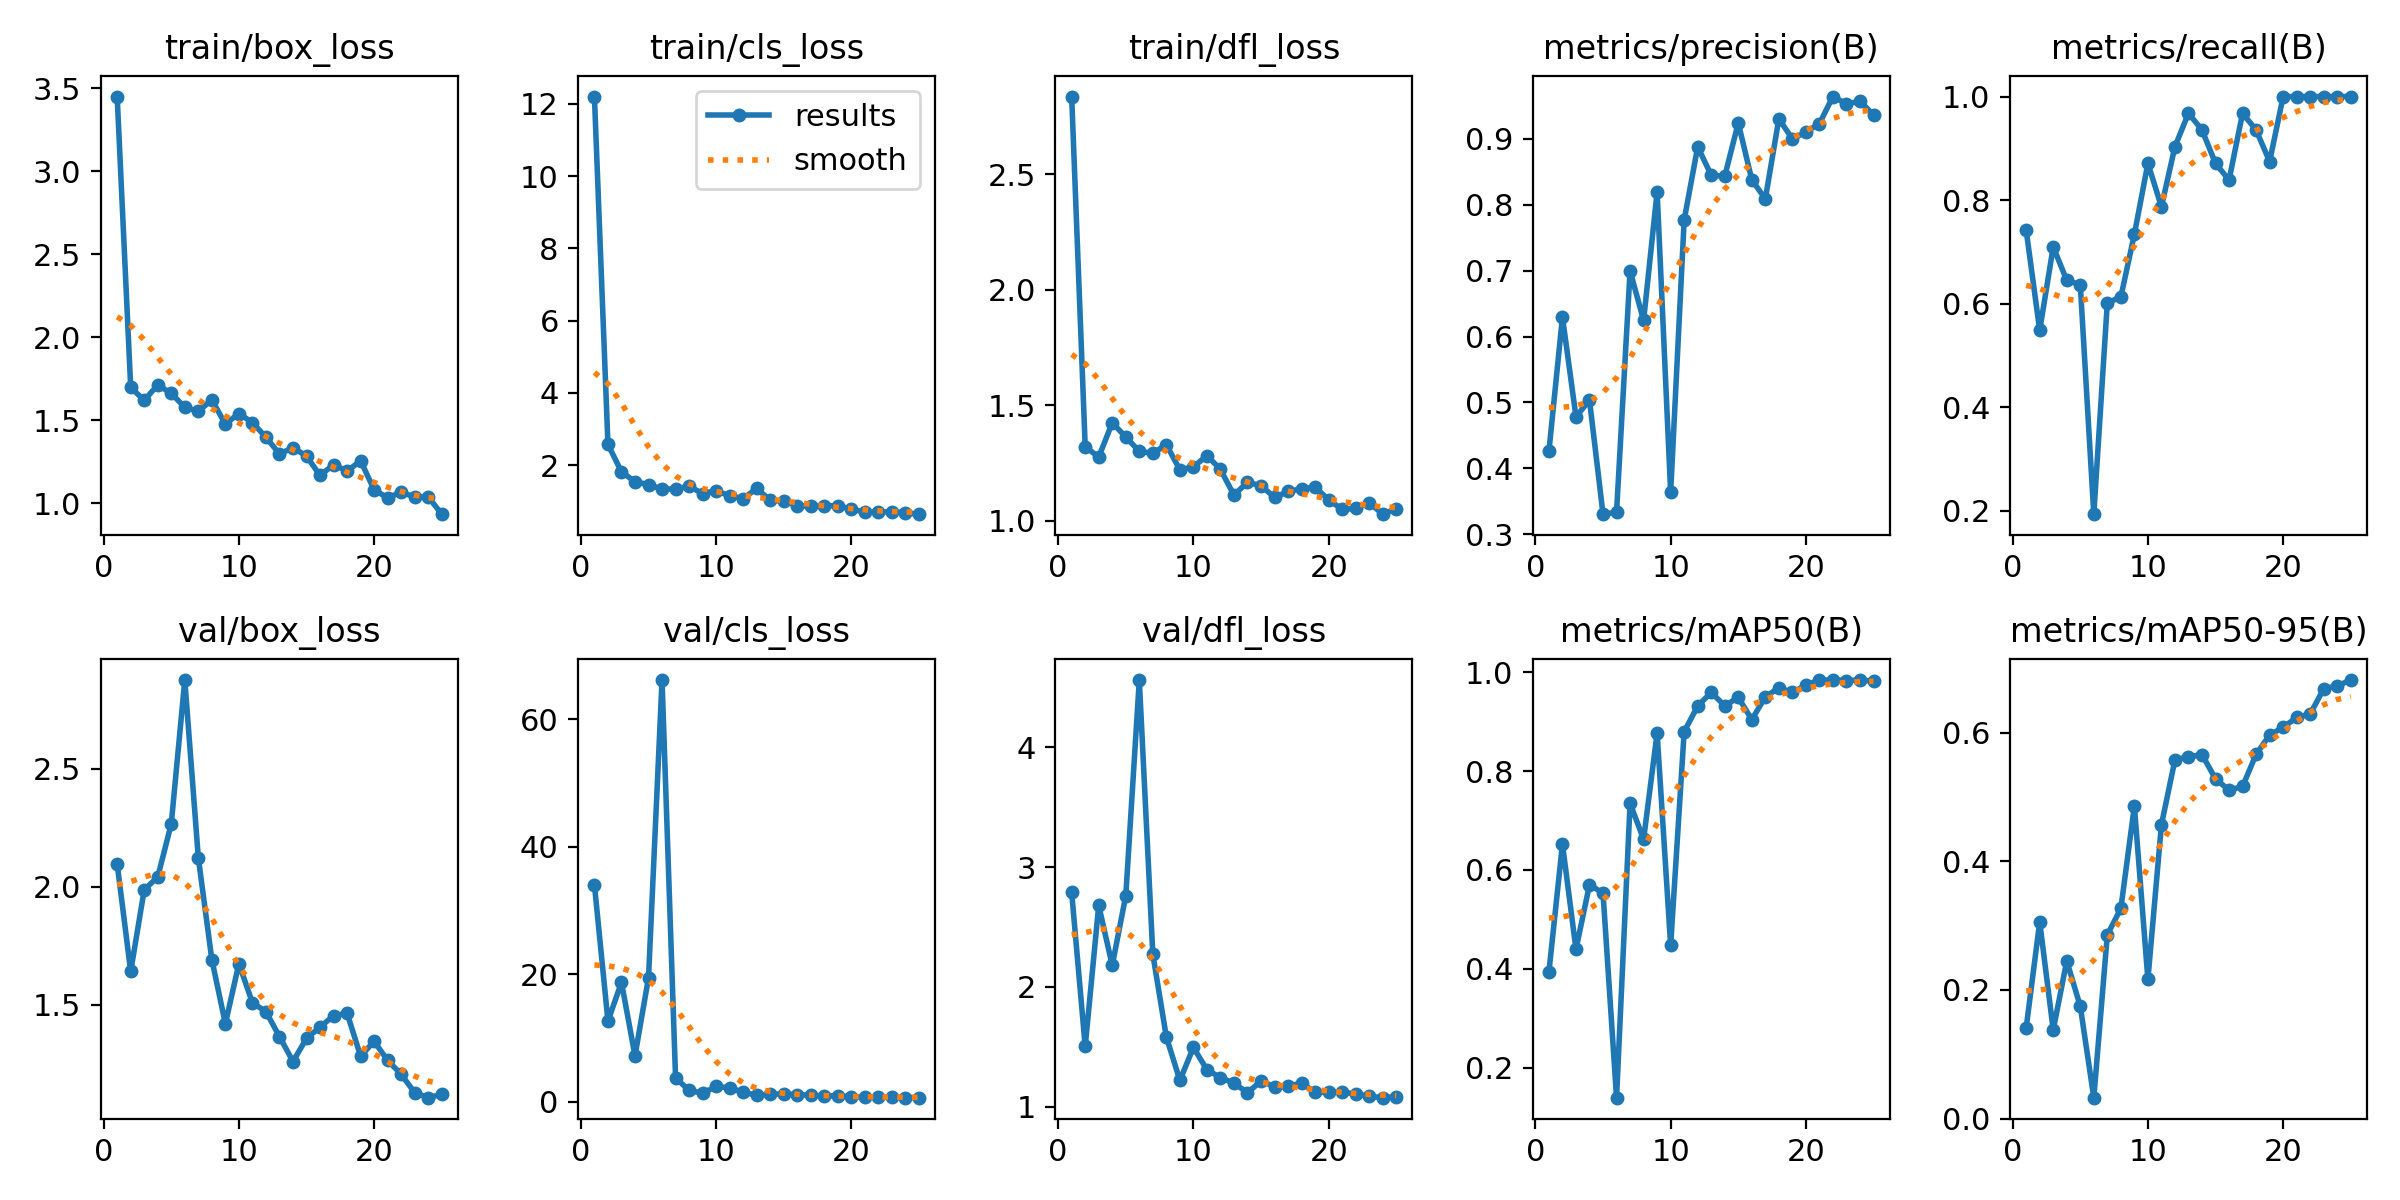

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


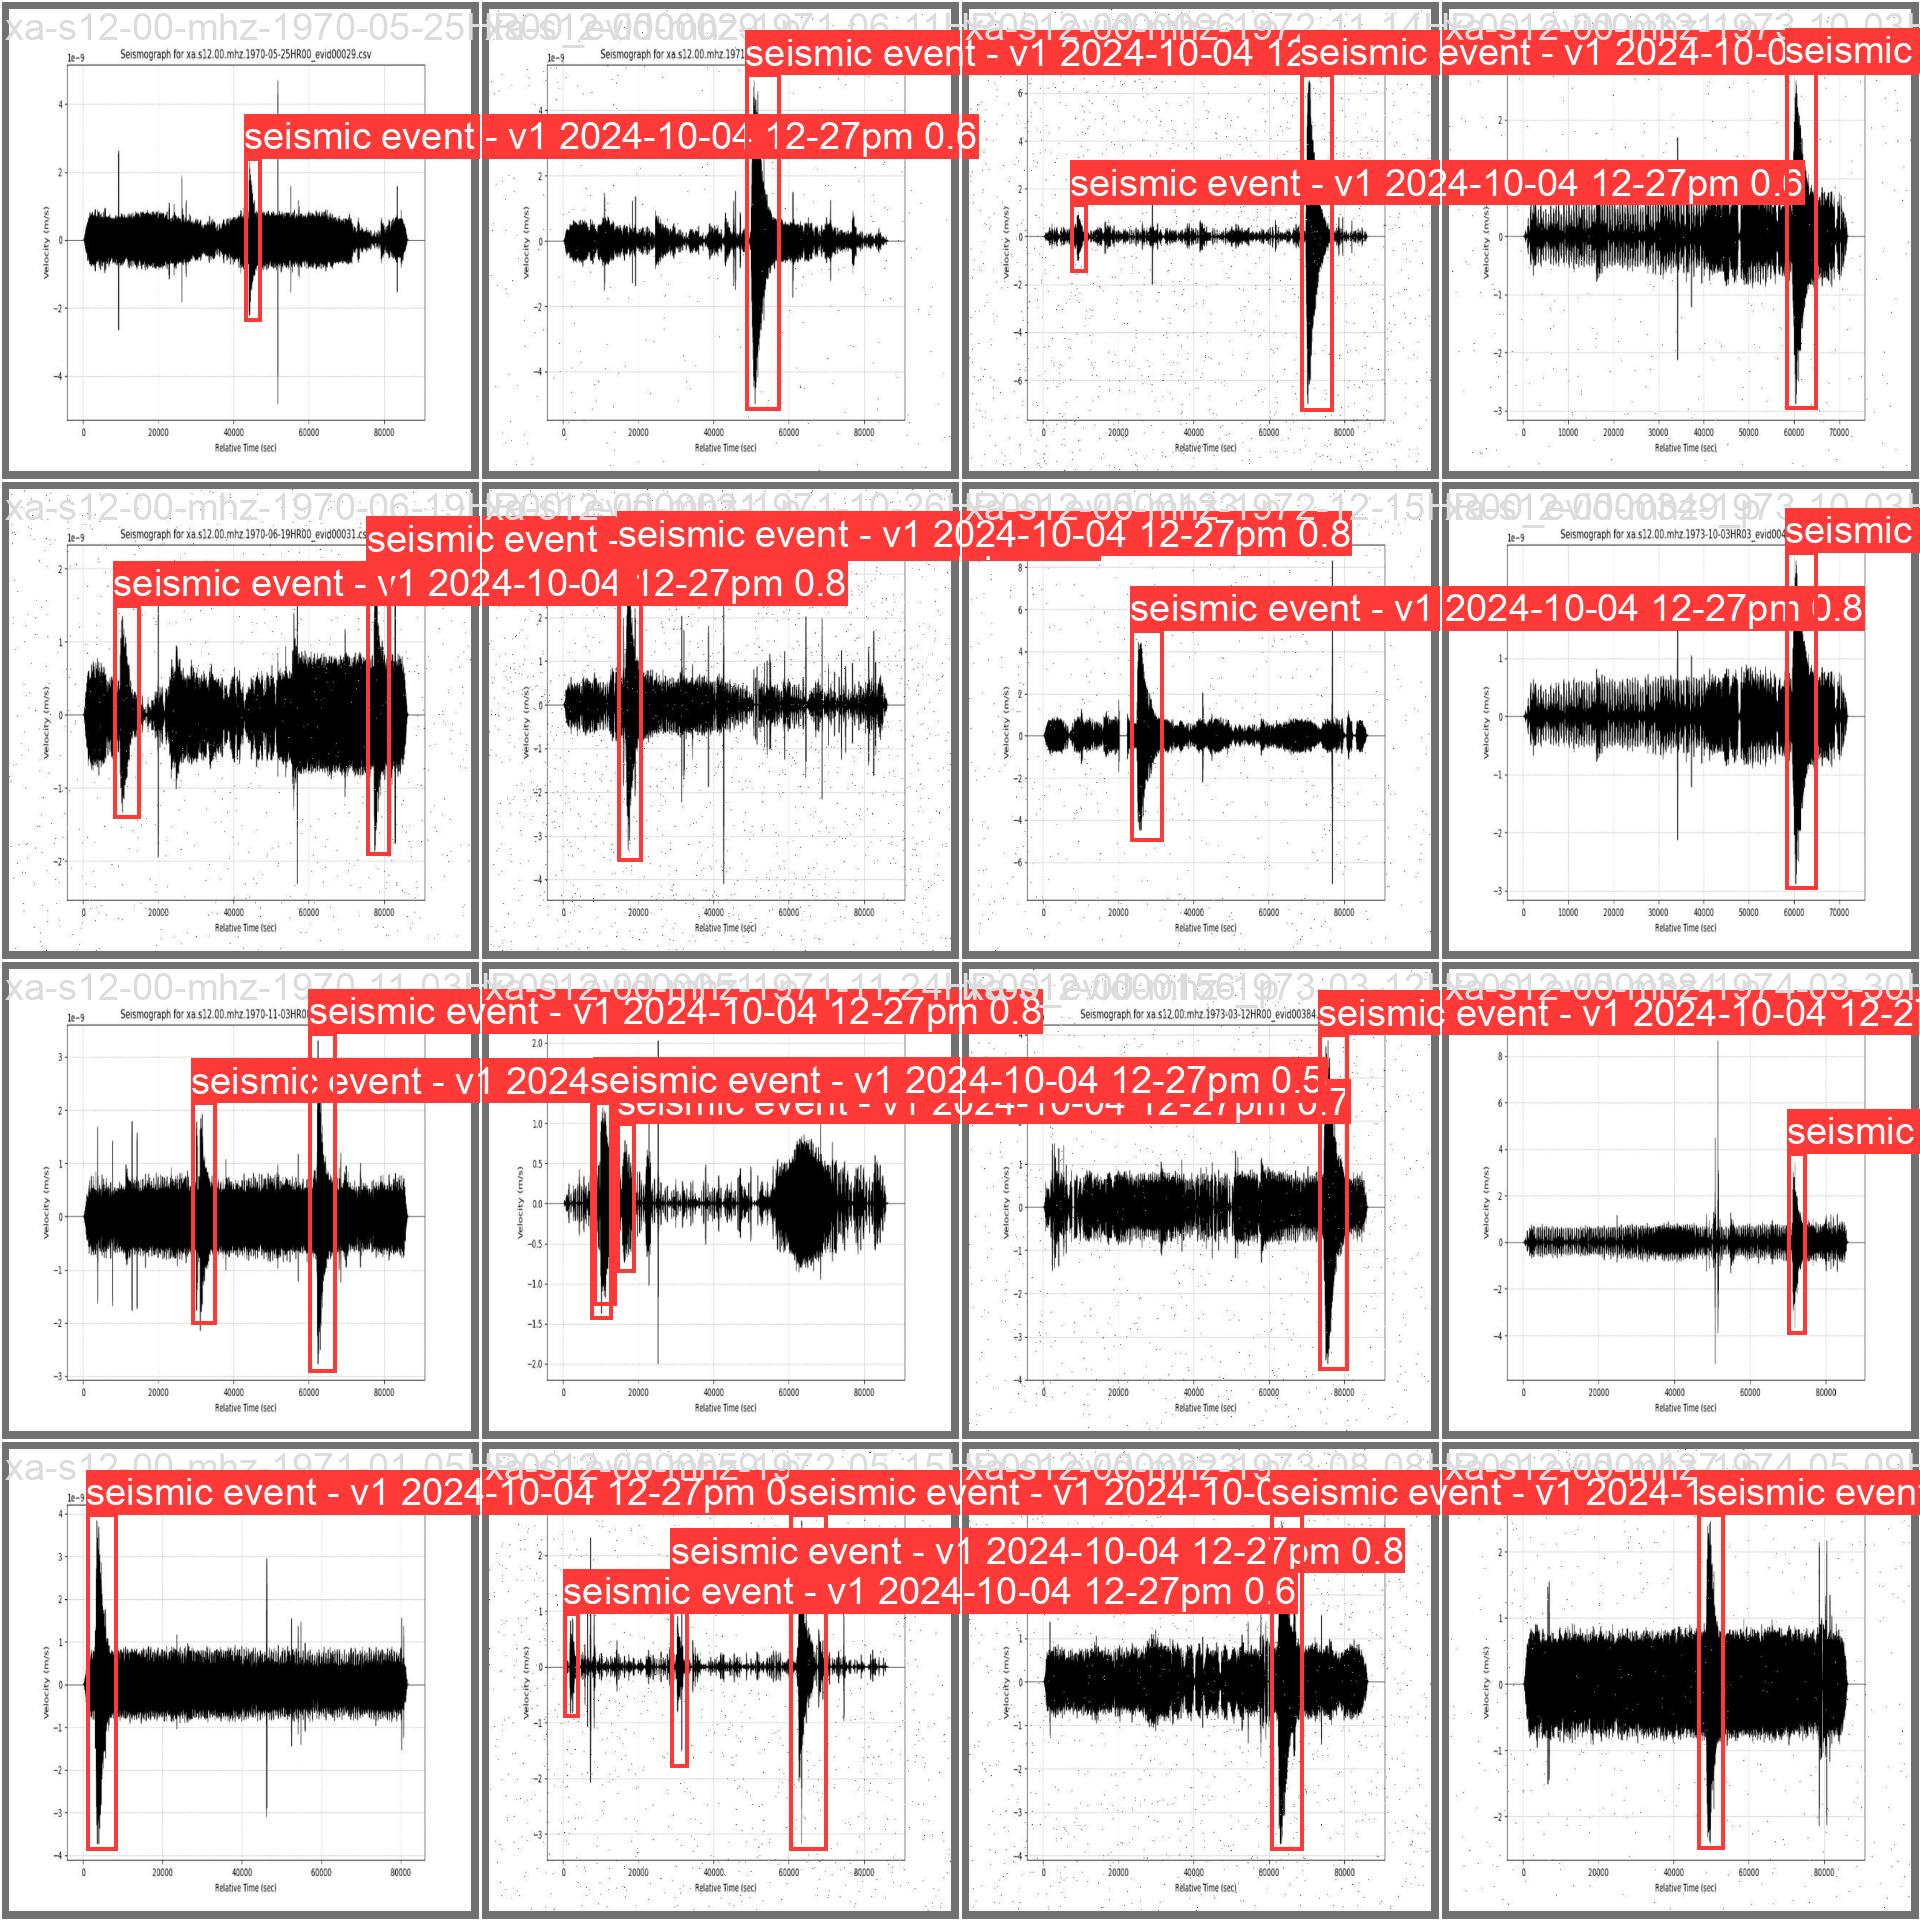

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate the Model


In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/seismic-events-1/valid/labels.cache... 24
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         24         31      0.937          1      0.982      0.678
Speed: 5.6ms preprocess, 34.3ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Testing the Model


In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/13 /kaggle/working/datasets/seismic-events-1/test/images/xa-s12-00-mhz-1970-05-23HR00_evid00027_png_jpg.rf.93d7716b43d511de1fbd728e69e21bc1.jpg: 800x800 1 seismic event - v1 2024-10-04 12-27pm, 10.5ms
image 2/13 /kaggle/working/datasets/seismic-events-1/test/images/xa-s12-00-mhz-1970-06-19HR00_evid00031_png_jpg.rf.bfce9ee5fe95ac4c2953d15ea98e30b2.jpg: 800x800 3 seismic event - v1 2024-10-04 12-27pms, 10.5ms
image 3/13 /kaggle/working/datasets/seismic-events-1/test/images/xa-s12-00-mhz-1971-04-08HR01_evid00083_png_jpg.rf.9f487c628449917d9511d0f4f463a723.jpg: 800x800 1 seismic event - v1 2024-10-04 12-27pm, 10.4ms
image 4/13 /kaggle/working/datasets/seismic-events-1/test/images/xa-s12-00-mhz-1971-06-11HR00_evid00096_png_jpg.rf.3c2303b0af86a4f1704e26a871836ec2.jpg: 800x800 1 seismic event - v

Let's take a look at few results.


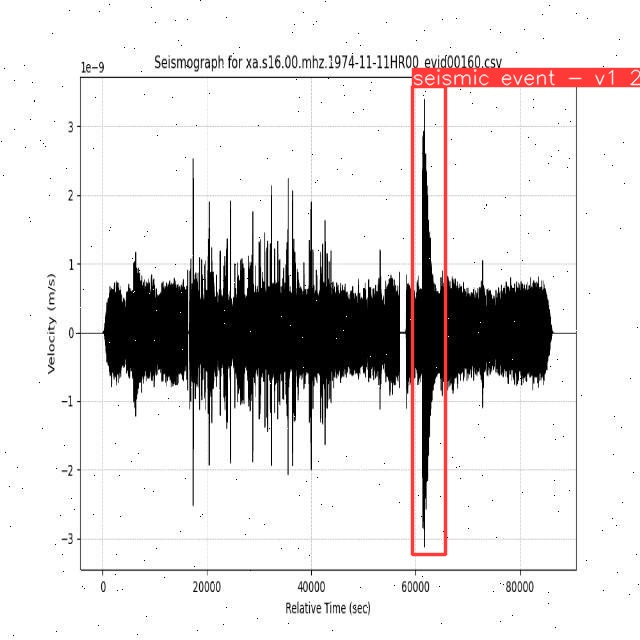

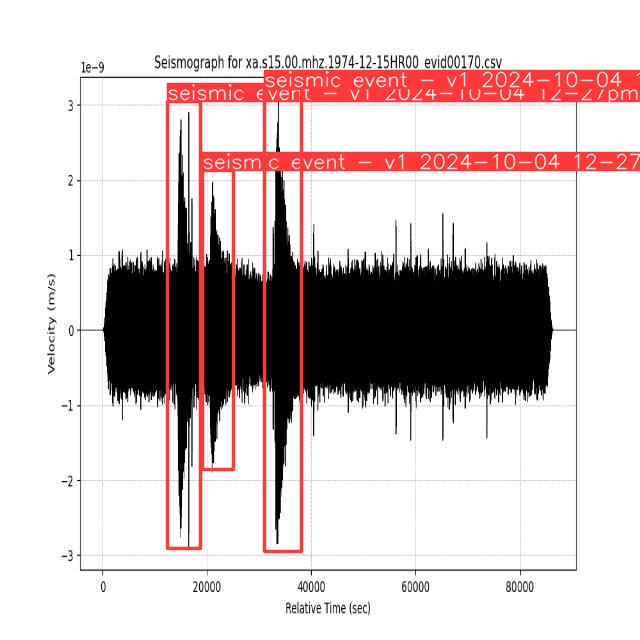

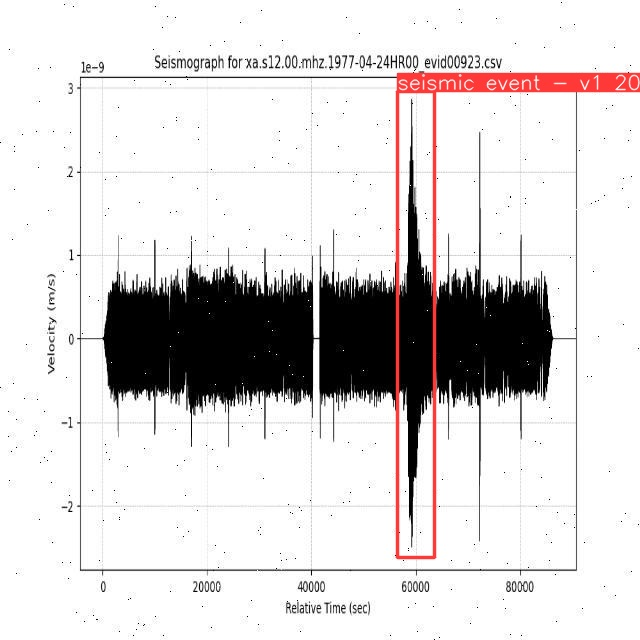

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Inference Engine


In [ ]:
MODEL_PATH="./Models/YOLOv8.pt"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO 

data_dir = "./space_apps_2024_seismic_detection/data/lunar/test/data/S15_GradeA/"
output_dir = "./images/plots/"

os.makedirs(output_dir, exist_ok=True)


for file in os.listdir(data_dir):
    # Step 1: Load the CSV file
    csv_file_path = os.path.join(data_dir, file)
    df = pd.read_csv(csv_file_path)

    # Step 2: Plot the velocity (m/s) column in black to simulate a seismograph
    plt.figure(figsize=(10, 5))
    plt.plot(df['velocity(m/s)'], color='black')  # Black color plot
    plt.title('Seismograph of Velocity (m/s)')
    plt.xlabel('Time')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)

    # Save the plot as an image file to use it with YOLOv8
    seismograph_image_path = './images/plots/' + file.split('.')[0] + '.png'
    plt.savefig(seismograph_image_path, bbox_inches='tight')
    plt.close()

model = YOLO(MODEL_PATH)  # Load the model

# Run batched inference on a list of images
plots_files = glob.glob(output_dir + "*.png")
results = model(plots_files, stream=True)  

# Process results generator
for result in results:
    boxes = result.boxes  
    result.show()  
    result.save(filename="result.jpg")

# Conclusion

Utilizing the YOLOv8 framework for seismic event detection has proven to be an efficient and robust approach. The model's ability to detect seismic events based on their spatial-temporal characteristics allows for real-time monitoring and early warning systems. YOLOv8's deep learning architecture, which balances speed and accuracy, makes it a strong candidate for large-scale deployment in seismic data analysis. By training and fine-tuning the model on seismic datasets, including amplitude and time-based features, it is possible to detect the start and end points of seismic events with high precision. Future work could involve integrating additional domain-specific features to improve model performance, as well as exploring hybrid approaches that combine YOLOv8 with other time series models such as LSTM for more nuanced event detection and classification. The results demonstrate the potential of deep learning in advancing seismic event detection technology and contributing to better understanding and mitigation of earthquake risks.
